#### NoteBook Contents & Summary 
            > 1. Data Overview / Exploration
            		- Data Types
            		- Missing Values 
            		- Target Variable Information                    
            > 2. Numerical Features Univariate Distribution
            		- Figures
            		- Histogram                   
            > 3. Correlation Analysis Features (Numeric Features)            
            > 4. Bivariate Distributions : Target Variable with respect to Numerical Features
            		- KDE Plot                     
            > 5. Categorical Features Univariate Distribution Analysis
            		- Counts
            		- Bar Chart                    
            > 6. Bivariate Distributions : Target Variable with respect to Categorical Features
            		- Bar Chart                    
            > 7. Data Preparation for Model
                        - Cast Object to Category for Light Gradient Boost Method Model 
                        - Data Split into Development and Validation Sample                        
            > 8. Model Building             
                Selected two models which can handle and allows numerical and categorical variables so there is no requirement of 
                encoding categorical variables:
                     1. H2O Random Forest 
                     2. Light Gradient Boosting Machine (LGBM) 

                     

#### Import Essential Data handling libraries

In [1]:
#data manipulation
import pandas as pd
import numpy as np
import re, string 
import time
from math import floor

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, roc_curve, auc

#Visuals
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', None)

#Models
import lightgbm as lgb
import h2o
from h2o.estimators import H2ORandomForestEstimator

#### Load Data

In [2]:
df_master = pd.read_csv("data.csv", header = None)

In [3]:
column_name = [
    "age",
    "workclass",
    "final_weight",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
] 

len(column_name)

15

In [4]:
df_master.shape
df_master.head(2)

(32561, 15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
df_master.columns = column_name

In [6]:
df_master.head(2)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
data = df_master.copy()

### 1. Data Overview / Exploration

In [8]:
#check datatypes
data.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

- There are two columns related to education

In [9]:
#label distribution
data["income_more_than_50K"] = data.income.apply(lambda x : 0 if str(x) == " <=50K" else 1)
data.income.value_counts() 
data.income_more_than_50K.value_counts()
data.income_more_than_50K.mean()*100

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

0    24720
1     7841
Name: income_more_than_50K, dtype: int64

24.080955744602438

##### Target Variable information
- ~24% of the population earns more than 50K
- Target variable is imbalanced 

In [10]:
categorical_variables = data.select_dtypes("O").drop("income",axis = 1).columns.tolist()
categorical_variables

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [11]:
numeric_variables = data.select_dtypes("int64").columns.tolist()
numeric_variables

['age',
 'final_weight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income_more_than_50K']

In [12]:
## Count of missing values - Numerical Features
data[numeric_variables].isnull().sum()

#No Missing Values

age                     0
final_weight            0
education_num           0
capital_gain            0
capital_loss            0
hours_per_week          0
income_more_than_50K    0
dtype: int64

In [13]:
## Count missing values - Categorical Features
data[categorical_variables].replace(" ?", np.nan).isnull().sum()

# The number of missing values is small compared to the whole population
# Missing value treatment include imputation or dropping of values 


workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
dtype: int64

### 2. Numerical Features Univariate Distribution

##### Looking at raw figures

In [14]:
data[numeric_variables].describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week,income_more_than_50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


- "age" : age range is 0 to 90
- "Capital Gain" :  mean is ~ 1100, median is 0,maximum value is 99999, min is 0
- "Capital Loss" :  mean is ~ 87, median is 0,maximum value is 4356, min is 0



##### Plotting Histograms 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'final_weight'}>,
        <AxesSubplot:title={'center':'education_num'}>],
       [<AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>],
       [<AxesSubplot:title={'center':'income_more_than_50K'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

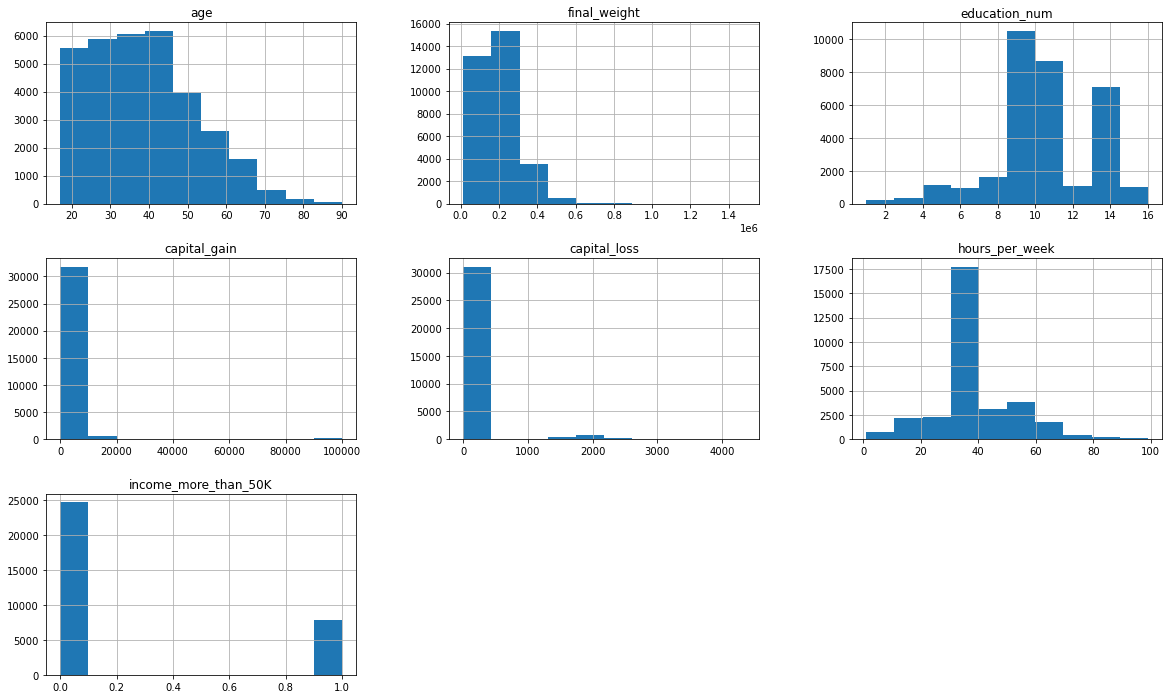

In [15]:
plt.rcParams["figure.figsize"] = [20, 12]
data[numeric_variables].hist()
plt.show()

- Age, Final Weight, Capital Gain and Capital Loss are right skewed 
- Hours Per Week looks like a close symmetric distribution

### 3. Correlation Analysis Features (Numeric Features)

In [16]:
correlations = data[numeric_variables+["income_more_than_50K"]].corr(method='pearson')

In [17]:
mpl.rcParams.update(mpl.rcParamsDefault)

<AxesSubplot:>

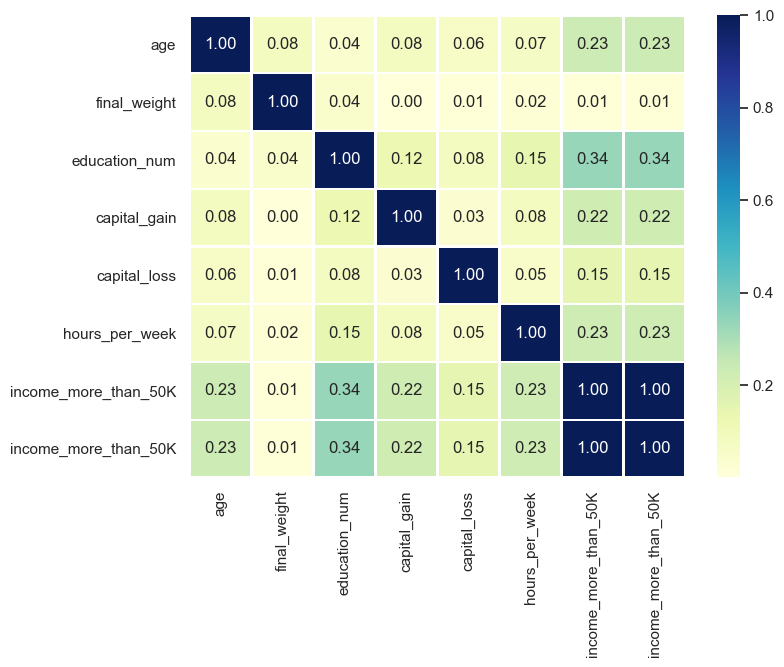

In [18]:
#correlation map
sns.set(font_scale=1)
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(np.abs(correlations), annot=True, linewidths= .9, fmt= ".2f",ax=ax, cmap="YlGnBu")

#correlations.to_csv("data/Correlation_Matrix.csv")

- No high correlation in between the independent variables
- No high correlation but some in between the independent variables vs dependent variable

### 4. Bivariate Distributions : Target Variable with respect to Numerical Features

In [19]:
numeric_df_with_target = data[numeric_variables].copy()
numeric_df_with_target["income_more_than_50K"] = data.income_more_than_50K.values

Text(0.5, 1.0, 'age')

<AxesSubplot:title={'center':'age'}, xlabel='age', ylabel='Density'>

<AxesSubplot:title={'center':'age'}, xlabel='age', ylabel='Density'>

Text(0.5, 1.0, 'final_weight')

<AxesSubplot:title={'center':'final_weight'}, xlabel='final_weight', ylabel='Density'>

<AxesSubplot:title={'center':'final_weight'}, xlabel='final_weight', ylabel='Density'>

Text(0.5, 1.0, 'education_num')

<AxesSubplot:title={'center':'education_num'}, xlabel='education_num', ylabel='Density'>

<AxesSubplot:title={'center':'education_num'}, xlabel='education_num', ylabel='Density'>

Text(0.5, 1.0, 'capital_gain')

<AxesSubplot:title={'center':'capital_gain'}, xlabel='capital_gain', ylabel='Density'>

<AxesSubplot:title={'center':'capital_gain'}, xlabel='capital_gain', ylabel='Density'>

Text(0.5, 1.0, 'capital_loss')

<AxesSubplot:title={'center':'capital_loss'}, xlabel='capital_loss', ylabel='Density'>

<AxesSubplot:title={'center':'capital_loss'}, xlabel='capital_loss', ylabel='Density'>

Text(0.5, 1.0, 'hours_per_week')

<AxesSubplot:title={'center':'hours_per_week'}, xlabel='hours_per_week', ylabel='Density'>

<AxesSubplot:title={'center':'hours_per_week'}, xlabel='hours_per_week', ylabel='Density'>

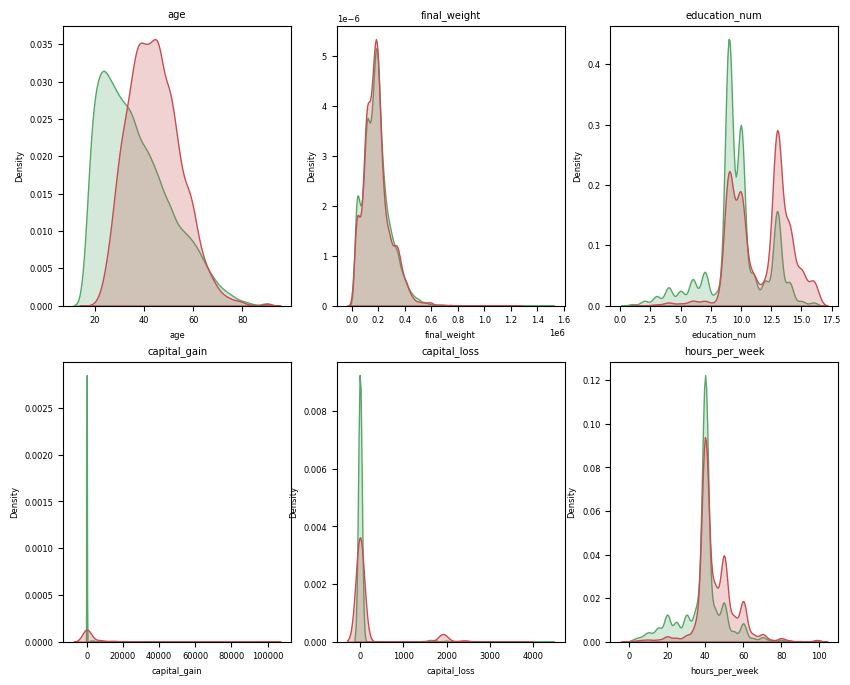

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'font.size': 6})

ncols = 3
nrows = 2

plt.rcParams["figure.figsize"] = [10, 8]
fig, axs = plt.subplots(ncols = ncols, nrows = nrows)

for i,var in enumerate(list(numeric_df_with_target.columns)[:-1]):
    axs[floor(i/ncols), i%ncols].set_title(var)
    sns.kdeplot(numeric_df_with_target.loc[numeric_df_with_target["income_more_than_50K"]==0,var], shade=True, 
                color="g",  label = "0" , ax = axs[floor(i/ncols), i%ncols])
    sns.kdeplot(numeric_df_with_target.loc[numeric_df_with_target["income_more_than_50K"]==1,var], shade=True, 
                color="r",  label = "1" , ax = axs[floor(i/ncols), i%ncols])

- Numerical Features seems to have huge overlap (showing almost similar distribution) with respect to target "income_more_than_50K"

### 5. Categorical Features Univariate Distribution Analysis

##### Looking at raw counts

In [21]:
data.select_dtypes("O").nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


<AxesSubplot:>

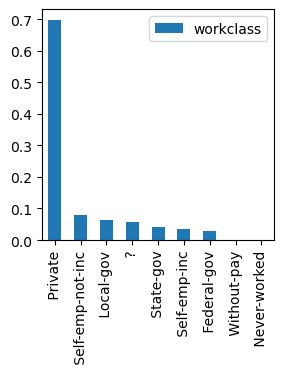



education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


<AxesSubplot:>

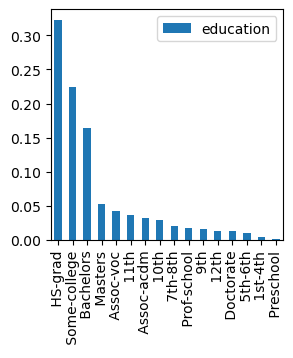



marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


<AxesSubplot:>

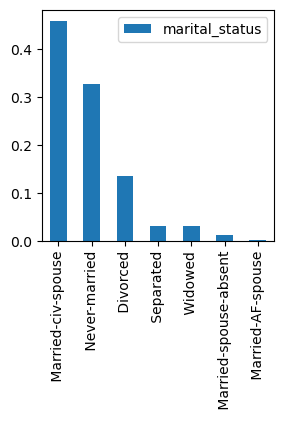



occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


<AxesSubplot:>

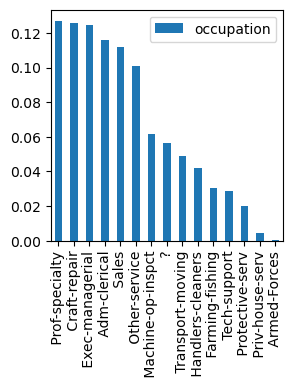



relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


<AxesSubplot:>

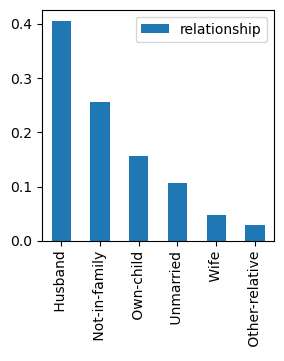



race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


<AxesSubplot:>

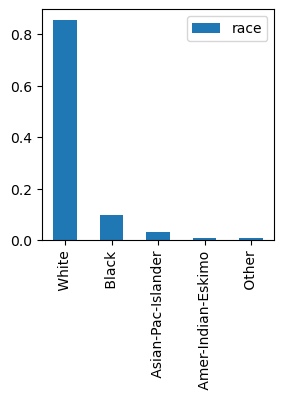



sex
 Male      21790
 Female    10771
Name: sex, dtype: int64


<AxesSubplot:>

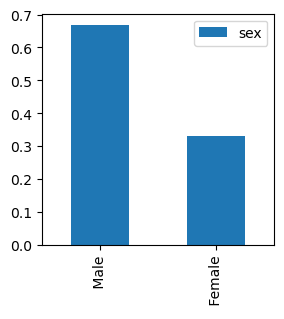



native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                

<AxesSubplot:>

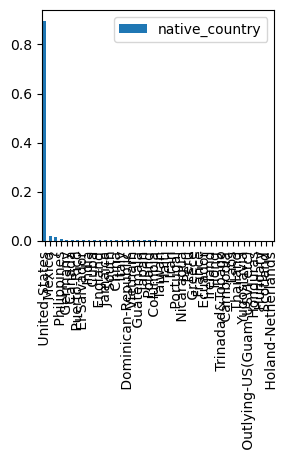

In [22]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [3, 3]
for cat_feat in categorical_variables :
    print(cat_feat)
    print(data[cat_feat].value_counts(dropna = False))
    pd.DataFrame(data[cat_feat].value_counts(normalize=True)).plot(kind = "bar")
    plt.show()
    # time.sleep(1)
    print("\n")

#### Observations

- Workclass: ~70% of the population is employed in the private sector
- Education: ~33% of the population has education upto HS, ~23% went to college, ~17% have bachelors degree
- Marital Status ~45% are married while ~30% have never married
- Race: ~85% of the population is White 
- Sex: ~Male participation is 2X female participation
- Country: ~90% population belong the United States

### 6. Bivariate Distributions : Target Variable with respect to Categorical Features

<AxesSubplot:xlabel='workclass'>

<AxesSubplot:xlabel='education'>

<AxesSubplot:xlabel='marital_status'>

<AxesSubplot:xlabel='occupation'>

<AxesSubplot:xlabel='relationship'>

<AxesSubplot:xlabel='race'>

<AxesSubplot:xlabel='sex'>

<AxesSubplot:xlabel='native_country'>

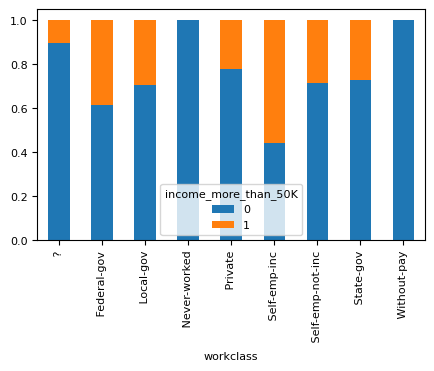

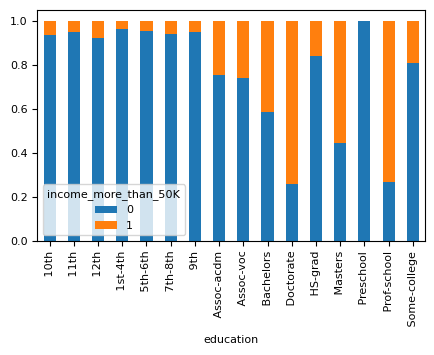

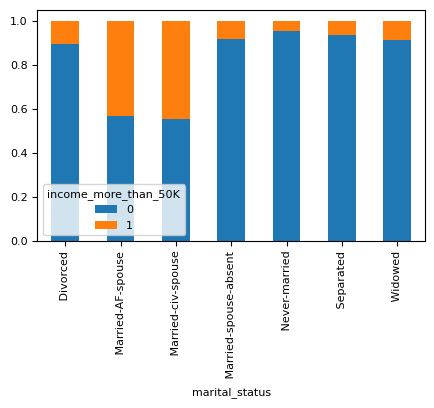

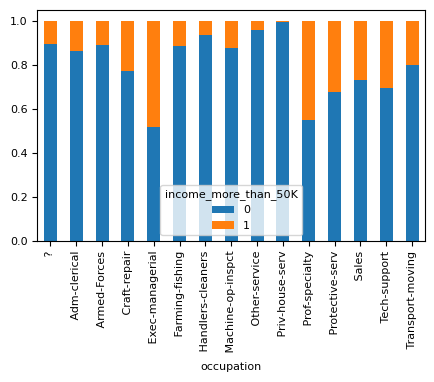

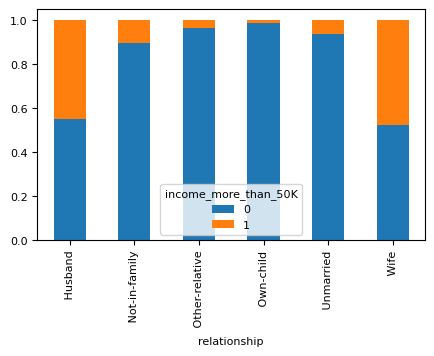

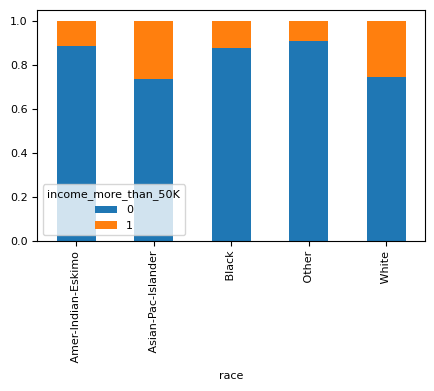

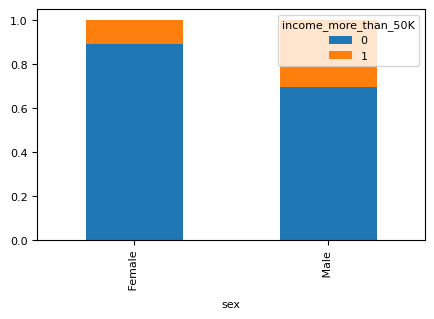

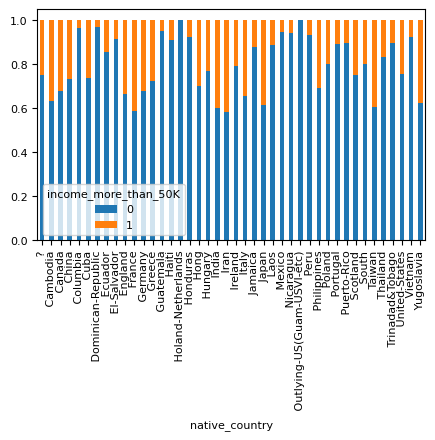

In [23]:
plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams.update({'font.size': 8})

for c in categorical_variables:
    pd.crosstab(data[c], 
                data["income_more_than_50K"],
               normalize="index" ).plot(kind = "bar", stacked = True)

#### Observations: 
- WorkClass : 60% of Self Employed & 40% of federal servants earn more than 50K  
- Education : 80% of Doctarates & Professors earn more than 50K
- Sex: 35% of Male & 15% of female earn more than 50K

### 7. Data Preparation for Model

In [24]:
# Cast Object to Category for Light Gradient Boost Method Model
for c in categorical_variables:
    data[c] = data[c].astype('category')
    

In [25]:
#Split the data into Development and Validation

X = data.drop(["income_more_than_50K","income"], axis = 1)
y = data[["income_more_than_50K"]]

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify = y , random_state = 90)

In [27]:
X_train.replace(" ?", np.nan).isnull().sum()

age                  0
workclass         1453
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1459
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     456
dtype: int64

# Missing data is represented by "?" in the data set. 
# A very small portion of the data set is missing in 3 variables in the dataset
# Missing values can be ignored as its a small proportion  

In [28]:
print("Check stratified Dependent: ")
y_train.mean()
y_val.mean()


print("\n \n Check Dependent Variable Distribution Development Data: ")
y_train.value_counts()
y_train.mean()


print("\n \n Check Dependent Variable Distribution Validation Data: ")
y_val.value_counts()
y_val.mean()

print("\n \n Shape of the Datasets:")
X_train.shape
X_val.shape

Check stratified Dependent: 


income_more_than_50K    0.240825
dtype: float64

income_more_than_50K    0.240749
dtype: float64


 
 Check Dependent Variable Distribution Development Data: 


income_more_than_50K
0                       19775
1                        6273
dtype: int64

income_more_than_50K    0.240825
dtype: float64


 
 Check Dependent Variable Distribution Validation Data: 


income_more_than_50K
0                       4945
1                       1568
dtype: int64

income_more_than_50K    0.240749
dtype: float64


 
 Shape of the Datasets:


(26048, 14)

(6513, 14)

In [29]:
# Correlation in Training
X_train.corr()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.078764,0.033150,0.079198,0.060056,0.069660
final_weight,-0.078764,1.000000,-0.045609,-0.000349,-0.008346,-0.017041
education_num,0.033150,-0.045609,1.000000,0.122913,0.077635,0.148378
capital_gain,0.079198,-0.000349,0.122913,1.000000,-0.032019,0.078923
capital_loss,0.060056,-0.008346,0.077635,-0.032019,1.000000,0.052529
hours_per_week,0.069660,-0.017041,0.148378,0.078923,0.052529,1.000000


### 8. Model Building

#### H20 Random Forrest Model 
- H2O allows direct use of categorical variables without encoding them in tree-based methods like Random Forest 

In [31]:
#intialization
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.311-b11, mixed mode)
  Starting server from C:\Users\Gaurab Das\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\GAURAB~1\AppData\Local\Temp\tmppwfh5e5f
  JVM stdout: C:\Users\GAURAB~1\AppData\Local\Temp\tmppwfh5e5f\h2o_Gaurab_Das_started_from_python.out
  JVM stderr: C:\Users\GAURAB~1\AppData\Local\Temp\tmppwfh5e5f\h2o_Gaurab_Das_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,9 months and 1 day !!!
H2O_cluster_name:,H2O_from_python_Gaurab_Das_5vlxtt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.516 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [32]:
# Data Preparation 
train = X_train.copy()
train[["income_more_than_50K"]] =  y_train

training_columns = list(X_train.columns)
response_column = list(y_train.columns)[0]

In [33]:
train.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_more_than_50K
11707,62,Private,97017,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,0
27153,33,Private,170148,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,0
10854,38,Private,238397,Bachelors,13,Divorced,Priv-house-serv,Unmarried,White,Female,0,0,24,United-States,0
12509,36,Private,193855,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1893,34,Private,192002,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,1


In [34]:
#check data types for converting to H20 Frame
train.dtypes

age                        int64
workclass               category
final_weight               int64
education               category
education_num              int64
marital_status          category
occupation              category
relationship            category
race                    category
sex                     category
capital_gain               int64
capital_loss               int64
hours_per_week             int64
native_country          category
income_more_than_50K       int64
dtype: object

In [35]:
# Convert Pandas to H20 Frame
train_h2o_df = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [36]:
train_h2o_df.types

{'age': 'int',
 'workclass': 'enum',
 'final_weight': 'int',
 'education': 'enum',
 'education_num': 'int',
 'marital_status': 'enum',
 'occupation': 'enum',
 'relationship': 'enum',
 'race': 'enum',
 'sex': 'enum',
 'capital_gain': 'int',
 'capital_loss': 'int',
 'hours_per_week': 'int',
 'native_country': 'enum',
 'income_more_than_50K': 'int'}

In [37]:
# Define model
model = H2ORandomForestEstimator(ntrees=50, max_depth=5, nfolds=10)

# Train model
model.train(x=training_columns, y=response_column, training_frame=train_h2o_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [38]:
#Validation Data Preparation

validation = X_val.reset_index().drop("index", axis = 1) 
validation['income_more_than_50K'] = y_val.reset_index().drop("index",axis =1 ) 
validation.head()
test_cols = train_h2o_df.drop("income_more_than_50K", axis =1).columns


val_h2o_df = h2o.H2OFrame(validation[test_cols]) 
val_h2o_df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_more_than_50K
0,52,Private,329733,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,0
1,28,Private,204516,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
2,60,Self-emp-not-inc,78913,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,0
3,30,State-gov,48214,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,1
4,28,State-gov,119793,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0


Parse progress: |█████████████████████████████████████████████████████████| 100%


age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
52,Private,329733,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States
28,Private,204516,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
60,Self-emp-not-inc,78913,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
30,State-gov,48214,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States
28,State-gov,119793,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico
24,Private,176389,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
56,Private,149686,9th,5,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States
44,Private,188331,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,42,United-States
31,Private,113838,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States


In [39]:
#predict on validation data 
pred_h2o = model.predict(val_h2o_df)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [41]:
#convert h2o frame to pandas
pred_h2o_pandas = h2o.as_list(pred_h2o)
pred_h2o_pandas

,predict
0,0.083589
1,0.019652
2,0.467707
3,0.686539
4,0.323359
...,...
6508,0.267857
6509,0.069209
6510,0.318752
6511,0.273029


In [42]:
# predict on development data 
pred_train_h2o = model.predict(train_h2o_df.drop('income_more_than_50K'))

drf prediction progress: |████████████████████████████████████████████████| 100%


In [43]:
# convert probability to labels
validation[["pred_prob_h2o_RFmodel"]] = pred_h2o_pandas
validation["pred_label_h2o_RFmodel"] = validation["pred_prob_h2o_RFmodel"].apply(lambda x : 1 if x > 0.5 else 0)

In [44]:
# Development DataFrame
development = X_train.reset_index().drop("index", axis = 1) 
development['income_more_than_50K'] = y_train.reset_index().drop("index",axis =1 ) 

train_pred_h2o_pandas = h2o.as_list(pred_train_h2o)
development[["pred_prob_h2o_RFmodel"]] = train_pred_h2o_pandas
development["pred_label_h2o_RFmodel"] = development["pred_prob_h2o_RFmodel"].apply(lambda x : 1 if x > 0.5 else 0)

In [45]:
#Calculate AUC

train_results_rf = []
val_results_rf = []


false_positive_rate, true_positive_rate, thresholds = roc_curve(development['income_more_than_50K'], development['pred_prob_h2o_RFmodel'])
roc_auc = auc(false_positive_rate, true_positive_rate)
train_results_rf.append(roc_auc)


false_positive_rate, true_positive_rate, thresholds = roc_curve(validation['income_more_than_50K'], validation['pred_prob_h2o_RFmodel'])
roc_auc = auc(false_positive_rate, true_positive_rate)
val_results_rf.append(roc_auc)


In [74]:
print("H2O Model Metrics: \n ")
print("Development Stats :")
print("Accuracy",accuracy_score(development["pred_label_h2o_RFmodel"], development["income_more_than_50K"]))
print("f1_score", f1_score(development["pred_label_h2o_RFmodel"], development["income_more_than_50K"]))
print("AUC:",train_results_rf[0])

#print("Prob Range: " + str(min(development['pred_prob_h2o_RFmodel'])) + " - " + str(max(development['pred_prob_h2o_RFmodel'])) )

print("\t")

print("Validation Stats :")
print("Accuracy",accuracy_score(validation["pred_label_h2o_RFmodel"], validation["income_more_than_50K"]))
print("f1_score", f1_score(validation["pred_label_h2o_RFmodel"], validation["income_more_than_50K"]))
print("AUC:", val_results_rf[0])
print("\t")
print("Prob Range: " + str(min(validation['pred_prob_h2o_RFmodel'])) + " - " + str(max(validation['pred_prob_h2o_RFmodel'])) )

H2O Model Metrics: 
 
Development Stats :
Accuracy 0.8545761670761671
f1_score 0.630727237278222
AUC: 0.9101526196491979
	
Validation Stats :
Accuracy 0.8504529402732995
f1_score 0.6189358372456965
AUC: 0.9072512561647511
	
Prob Range: 0.0113428736897185 - 0.9415714919567107


Observation: Accuracy, F1_score, AUC indicate there is no overfitting in Random Forest model

#### Light Gradient Boosting Machine (LGBM) Model
- LGBM allows direct use of categorical variables without encoding them

In [49]:
train_data = lgb.Dataset(X_train, 
                         label=y_train,
                         categorical_feature=["workclass", "education", "marital_status", 
                                              "occupation", "relationship", "race", "sex", "native_country"],
                         free_raw_data=False)

val_data = lgb.Dataset(X_val, 
                       label=y_val,
                       categorical_feature=["workclass", "education", "marital_status", 
                                              "occupation", "relationship", "race", "sex", "native_country"],
                       free_raw_data=False)

train_results = []
val_results = []

parameters = {
              'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'learning_rate': 0.05,
              'verbose': -1,
             }



lgbm_model = lgb.train(parameters,train_data,
                            valid_sets=val_data,
                            verbose_eval = 1000, early_stopping_rounds=50)


#Calculate AUC
train_pred = lgbm_model.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
train_results.append(roc_auc)

y_pred_val = lgbm_model.predict(X_val)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred_val)
roc_auc = auc(false_positive_rate, true_positive_rate)
val_results.append(roc_auc)


C:\Users\Gaurab Das\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Gaurab Das\anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\Gaurab Das\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Gaurab Das\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.929188


In [50]:
pd.DataFrame(y_pred_val).describe()

,0
count,6513.000000
mean,0.351819
std,0.344941
min,0.003643
25%,0.030773
50%,0.213345
75%,0.670553
max,0.991798


In [53]:
validation["pred_prob_LGBM"] = y_pred_val
validation["pred_label_LGBM"] = validation["pred_prob_LGBM"].apply(lambda x : 1 if x > 0.5 else 0)

validation[["pred_label_LGBM"]].value_counts()
validation[["income_more_than_50K"]].value_counts()

pred_label_LGBM
0                  4252
1                  2261
dtype: int64

income_more_than_50K
0                       4945
1                       1568
dtype: int64

In [56]:
development["pred_prob_LGBM"] = train_pred
development["pred_label_LGBM"] = development["pred_prob_LGBM"].apply(lambda x : 1 if x > 0.5 else 0)
development.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_more_than_50K,pred_prob_h2o_RFmodel,pred_label_h2o_RFmodel,pred_prob_LGBM,pred_label_LGBM
0,62,Private,97017,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,0,0.315820,0,0.636120,1
1,33,Private,170148,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,0,0.053349,0,0.071829,0
2,38,Private,238397,Bachelors,13,Divorced,Priv-house-serv,Unmarried,White,Female,0,0,24,United-States,0,0.093487,0,0.036596,0
3,36,Private,193855,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0.266949,0,0.527321,1
4,34,Private,192002,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,1,0.720555,1,0.888160,1


In [73]:
print("LGBM Model Metrics: \n ")
print("Development Stats :")
print("Accuracy",accuracy_score(development["pred_label_LGBM"], development["income_more_than_50K"]))
print("f1_score", f1_score(development["pred_label_LGBM"], development["income_more_than_50K"]))
print("AUC:",train_results[0])

# print("Prob Range: " + str(min(train_pred)) + " - " + str(max(train_pred)) )

print("\t")

print("Validation Stats :")
print("Accuracy",accuracy_score(validation["pred_label_LGBM"], validation["income_more_than_50K"]))
print("f1_score", f1_score(validation["pred_label_LGBM"], validation["income_more_than_50K"]))
print("AUC:", val_results[0])

print("\t")
print("Prob Range: " + str(min(y_pred_val)) + " - " + str(max(y_pred_val)) ) 

LGBM Model Metrics: 
 
Development Stats :
Accuracy 0.8430589680589681
f1_score 0.7330198537095088
AUC: 0.9405056970626223
	
Validation Stats :
Accuracy 0.8327959465684016
f1_score 0.7155915382606424
AUC: 0.9291880971296506
	
Prob Range: 0.003642573616884681 - 0.9917980987835442


Observation: Accuracy, F1_score, AUC indicate there is no overfitting in LGBM Model also

### Conclusion 

    - Both Random Forrest and LGBM are performing good and are indicator of robust and stable classifiers without overfitting.
    - Model of choice is LGBM as it has better F1 Score (Harmonic Mean of Precision and Recall) which indicates that we have balanced 
      output even though the target variable is imbalanced.
    - Threshold Probability for Class Labels is 0.5 .
    


